<a href="https://colab.research.google.com/github/Noob919/PET-EXPERIMENT/blob/main/modified_per_DTG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense
from keras import Sequential
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv("/content/MODIFIED PET MP.csv")
df.drop(0, inplace=True)
df.rename(columns={'Unnamed: 5': "label"}, errors="raise",inplace =  True)
df_na = df.dropna()
df_na.tail(5)
df_res =  df_na[['time', 'tem', 'heating rate', 'Weight loss']]
df_res.tail(3)

label = df_na['label']
label = label.reset_index()
def root_series(df):
  df_sq = df*df
  df_sum = df_sq.sum(axis=1)
  root =  pd.Series(data  = df_sum)
  root = pd.DataFrame(np.power(root, 0.5), columns = ['Root'])
  return root

def transformation(DataFrame):
  scaler  = Normalizer()
  transform_df = scaler.fit_transform(DataFrame)
  return transform_df

transform_df = transformation(df_res)
transform_df = pd.DataFrame(transform_df)
transform_df.columns = ['time', 'tem', 'heating rate', 'DTG ']
transform_df
dataframe = pd.concat([transform_df,label],axis =1)
dataframe
df_training = dataframe.loc[dataframe['label'] == "Training"]
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['DTG ']

In [3]:
model = keras.Sequential(
    [
        layers.Dense(3, activation="relu"),
        layers.Dense(6, activation="relu"),
        layers.Dense(8, activation="sigmoid"),
        layers.Dense(1),
    ]
)
model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.fit(X, y, epochs=50, batch_size=10, verbose=1, validation_split=0.4)

Epoch 1/50
193/193 [==============================] - 1s 3ms/step - loss: 0.1825 - root_mean_squared_error: 0.4272 - val_loss: 0.0311 - val_root_mean_squared_error: 0.1764
Epoch 2/50
193/193 [==============================] - 0s 2ms/step - loss: 0.0029 - root_mean_squared_error: 0.0536 - val_loss: 0.0110 - val_root_mean_squared_error: 0.1050
Epoch 3/50
193/193 [==============================] - 0s 2ms/step - loss: 0.0023 - root_mean_squared_error: 0.0476 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1059
Epoch 4/50
193/193 [==============================] - 0s 2ms/step - loss: 0.0022 - root_mean_squared_error: 0.0471 - val_loss: 0.0111 - val_root_mean_squared_error: 0.1053
Epoch 5/50
193/193 [==============================] - 0s 2ms/step - loss: 0.0021 - root_mean_squared_error: 0.0462 - val_loss: 0.0111 - val_root_mean_squared_error: 0.1053
Epoch 6/50
193/193 [==============================] - 0s 2ms/step - loss: 0.0020 - root_mean_squared_error: 0.0442 - val_loss: 0.0108 - val_

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 6)                 24        
                                                                 
 dense_2 (Dense)             (None, 8)                 56        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 101 (404.00 Byte)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
met_df  = pd.DataFrame(model.history.history)

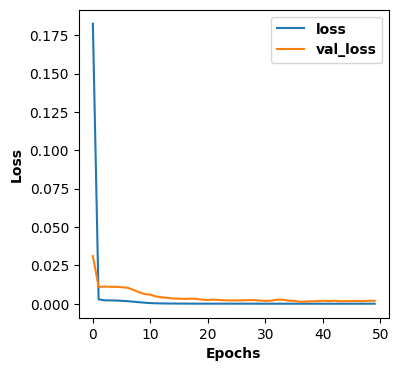

In [6]:
plt.figure(figsize=(4, 4))  # Set the figure size to 4x4 inches

# Plot the loss and validation loss
plt.plot(met_df['loss'], label='loss')
plt.plot(met_df['val_loss'], label='val_loss')

# Set the labels and legend
plt.xlabel('Epochs',fontsize=10, fontweight='bold')
plt.ylabel('Loss',fontsize=10, fontweight='bold')
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')

# Show the plot
plt.show()

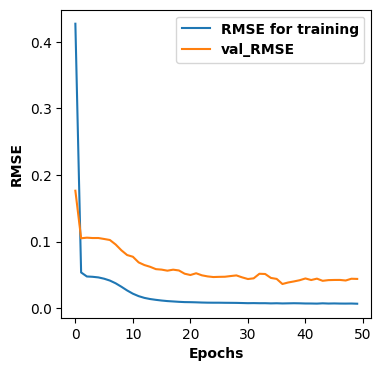

In [7]:
plt.figure(figsize=(4, 4))  # Set the figure size to 4x4 inches

# Plot the RMSE for training and validation
plt.plot(met_df['root_mean_squared_error'], label='RMSE for training')
plt.plot(met_df['val_root_mean_squared_error'], label='val_RMSE')

# Set the labels and legend
plt.xlabel('Epochs',fontsize=10, fontweight='bold')
plt.ylabel('RMSE',fontsize=10, fontweight='bold')
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')

# Show the plot
plt.show()

In [11]:
df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['DTG ']

X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
predictions = model.predict(X_val)
prediction = pd.DataFrame(predictions)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df.head(3)

13/13 [==============================] - 0s 1ms/step


,time,tem,heating rate,preditions,DTG
0,0.000015,0.066503,0.997547,0.003032,0.021829
1,0.000410,0.342108,0.933021,0.110552,0.111508
2,0.001133,0.536705,0.825700,0.176967,0.173681


In [12]:
print('MSE',mean_squared_error(y_val,predictions))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions)))
print('MAE',mean_absolute_error(y_val,predictions))
print('R2_Score',r2_score(y_val,predictions))

MSE 0.00078161436361385
RMSE 0.027957366893429897
MAE 0.019343090447259067
R2_Score 0.8076245452665467


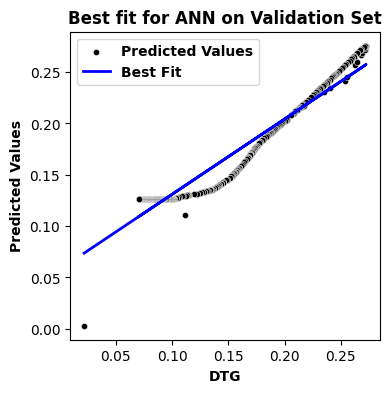

In [17]:
# Assuming the column name is 'DTG' (without a space)
x = final_df['DTG ']
y = final_df['preditions']
a, b = np.polyfit(x, y, 1)

# Create a smaller figure with a specified size
plt.figure(figsize=(4, 4))  # Adjust the width and height as needed

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(data=final_df, x='DTG ', y='preditions', color='black', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width and color
plt.plot(x, a * x + b, color='blue', label='Best Fit', linewidth=2)

# Set the grid size and style
#plt.grid(True, linestyle='--', alpha=0.5)

# Set the title and labels
plt.title('Best fit for ANN on Validation Set', fontsize=12, fontweight='bold')
plt.xlabel('DTG', fontsize=10, fontweight='bold')
plt.ylabel('Predicted Values', fontsize=10, fontweight='bold')

# Get the legend and make it bold
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')

# Show the plot
plt.show()

In [18]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['DTG ']

predictions = model.predict(X_test)
prediction_test  = pd.DataFrame(predictions)
print('MSE',mean_squared_error(y_test,predictions))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions)))
print('MAE',mean_absolute_error(y_test,predictions))
print('R2_Score',r2_score(y_test,predictions))

13/13 [==============================] - 0s 1ms/step
MSE 0.0008133562759704728
RMSE 0.02851940174636335
MAE 0.020281798711526078
R2_Score 0.8034723230873294


In [19]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
prediction = pd.DataFrame(predictions)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,DTG
0,9.121918e-07,0.016664,0.999846,-0.017639,0.005473
1,7.291845e-05,0.148165,0.987769,0.036161,0.048564
2,1.283030e-04,0.195713,0.978567,0.054995,0.064056
3,3.428455e-04,0.314557,0.943672,0.100405,0.102649
4,5.191274e-04,0.381633,0.915920,0.124825,0.124281
...,...,...,...,...,...
401,6.883534e-02,0.994973,0.015075,0.126576,0.071153
402,6.896480e-02,0.994992,0.014970,0.126576,0.070787
403,6.897134e-02,0.994992,0.014966,0.126576,0.070776
404,6.897715e-02,0.994993,0.014962,0.126576,0.070764


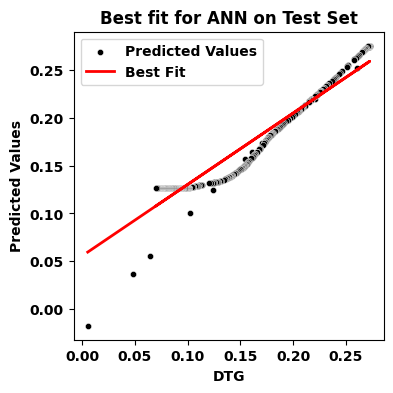

In [21]:
# Assuming the column names are 'DTG' and 'predictions_test' (without spaces)
x = final_df_test['DTG ']
y = final_df_test['predictions_test']

# Calculate the best-fit line coefficients
a, b = np.polyfit(x, y, 1)

# Create a smaller figure with a specified size
plt.figure(figsize=(4,4))  # Adjust the width and height as needed

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(data=final_df_test, x='DTG ', y='predictions_test', color='black', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width and color
plt.plot(x, a * x + b, color='red', label='Best Fit', linewidth=2)

# Set the grid size and style
# plt.grid(True, linestyle='--', alpha=0.5)

# Set the title and labels
plt.title('Best fit for ANN on Test Set', fontsize=12, fontweight='bold')
plt.xlabel('DTG', fontsize=10, fontweight='bold')
plt.ylabel('Predicted Values', fontsize=10, fontweight='bold')

# Get the legend and make it bold
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')

# Make the axes labels and ticks bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Show the plot
plt.show()

In [22]:
from tensorflow.keras.utils import plot_model

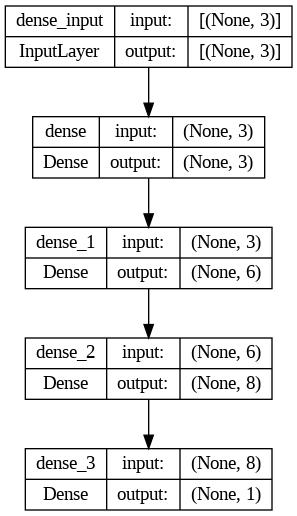

In [23]:
plot_model(model, to_file='/content/model.jpg',show_shapes=True)